In [24]:
### Importação das bibliotecas e carregamento dos dados

In [2]:
# importação das bibliotecas usadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# carregamento de dados
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(link, header=None, names=columns)

# Análise Descritiva do Dataset Iris

O Dataset "Iris Plants Database" é um clássico na área de Ciência de Dados, sendo "amigável para iniciantes". O dataset contém 150 amostras de três espécies de plantas iris (Setosa, Versicolour e Virginica). Cada amostra possui quatro atributos numéricos (medidas das sépalas e pétalas) e um atributo de classe.

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Verificação da Necessidade de Limpeza de Dados

Foi verificado a existência de valores ausentes e/ou duplicatas:

In [ ]:
# verificando valores faltando e duplicatas
print(df.isnull().sum())
print(df.duplicated().sum())

Não há valores faltantes, mas existem algumas duplicatas.

In [3]:
df = df.drop_duplicates() # apagando os valores duplicados

A remoção de duplicatas é importante pois duplicatas podem afetar a análise.

### Medidas de Tendência Central do Conjunto

Foram calculadas as medidas de tendência central (média, moda e mediana):

In [12]:
# medidas de tendência central
print("Resumo estatístico:")
print(df.describe())

# media
print("\nMédia:")
print(df.mean(numeric_only=True)) # média calculada apenas p/valores numéricos

# moda
print("\nModa:")
print(df.mode().dropna()) # removendo valores NaN

# mediana
print("\nMediana")
print(df.median(numeric_only=True)) # mediana calculada apenas p/valores numéricos

Resumo estatístico:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Média:
sepal_length    5.856463
sepal_width     3.055782
petal_length    3.780272
petal_width     1.208844
dtype: float64

Moda:
   sepal_length  sepal_width  petal_length  petal_width          species
0           5.0          3.0           1.4          0.2  Iris-versicolor

Mediana
sepal_length    5.8
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64


Entender e conhecer a distribuição de classes no conjunto de dados é crucial para verificar se o conjunto está balanceado ou não.



### Identificação das Espécies e Quantidade de Observações

Existem três espécies (classes), com as seguintes quantidades de observações de cada uma:

In [25]:
print(df['species'].value_counts())

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


> Originalmente cada espécie tinha 50 observações cada, porém anteriormente foram removidas.

### Medidas de Tendência Central por Espécie

In [32]:
# medidas de tendência central
print("Resumo estatístico:")
print(df.groupby('species').describe())

# media
print("\nMédia:")
print(df.groupby('species').mean(numeric_only=True)) # média calculada apenas p/valores numéricos

# moda
print("\nModa:")
print(df.groupby('species').agg(lambda x: x.mode().values[0])) # usando uma função lambda p pegar a moda das primeiras colunas e evitar múltiplas modas

# mediana
print("\nMediana")
print(df.groupby('species').median(numeric_only=True)) # mediana calculada apenas p/valores numéricos

Resumo estatístico:
                sepal_length                                               \
                       count      mean       std  min  25%  50%  75%  max   
species                                                                     
Iris-setosa             48.0  5.010417  0.359219  4.3  4.8  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
Iris-virginica          49.0  6.604082  0.632113  4.9  6.3  6.5  6.9  7.9   

                sepal_width            ... petal_length      petal_width  \
                      count      mean  ...          75%  max       count   
species                                ...                                 
Iris-setosa            48.0  3.431250  ...          1.6  1.9        48.0   
Iris-versicolor        50.0  2.770000  ...          4.6  5.1        50.0   
Iris-virginica         49.0  2.979592  ...          5.9  6.9        49.0   

                                                            

A análise demonstra como as medidas podem variar entre as espécies, o que implica que as variáveis de tamanho da flor são cruciais para identificar espécies diferentes.

### Gráfico de Distribuição das Variáveis

Foram gerados histogramas para visualizar as distribuições de cada variável.

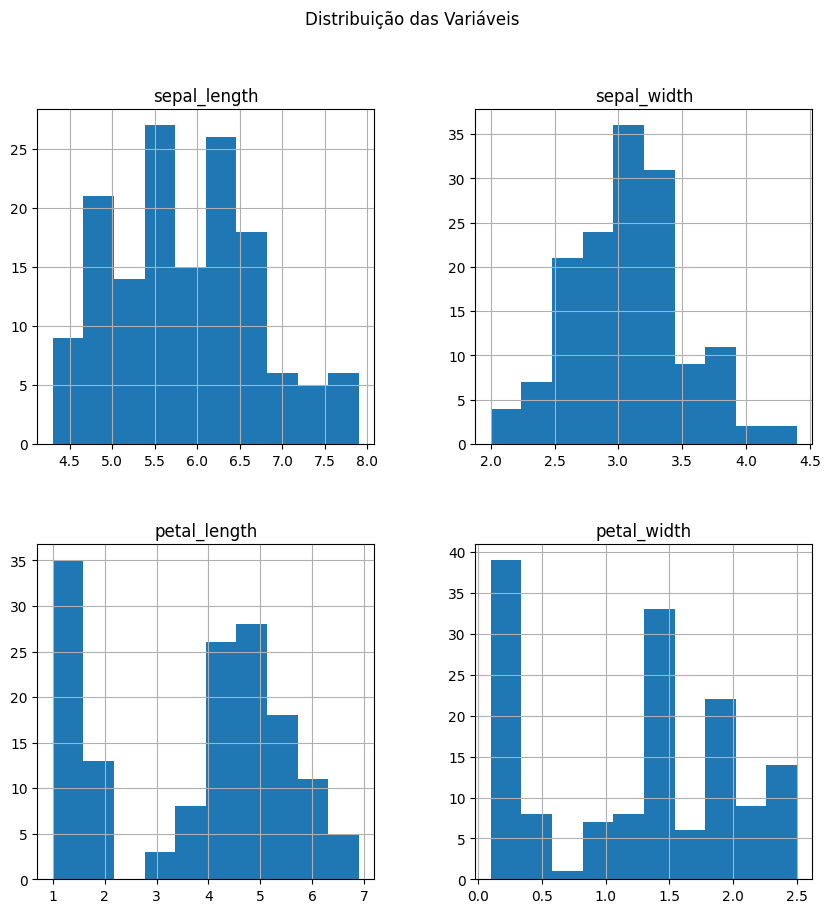

5

In [38]:
df.hist(figsize=(10,10))
plt.suptitle('Distribuição das Variáveis')
plt.show()

A bimodalidade nas características das pétalas sugere populações distintas, favorecendo métodos de classificação As características das pétalas parecem ser melhores preditores para diferenciar espécies do que as das sépalas

### Gráfico de Distribuição das Variáveis por Espécie

Seguindo os gráficos de distribuição, foram gerados _bloxplots_ (diagramas de caixa) para cada variável, separados por espécie.

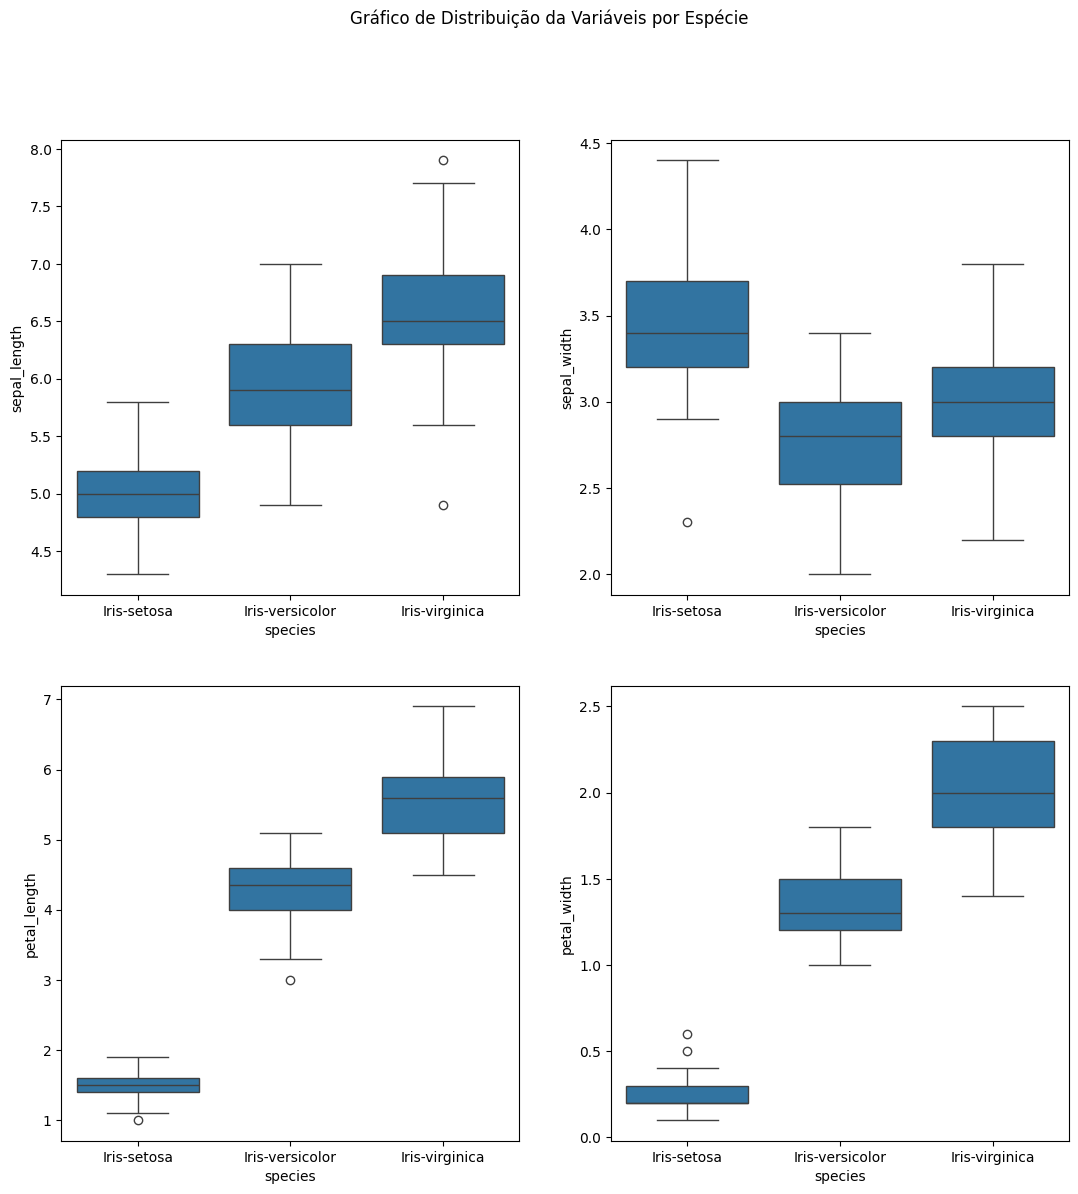

In [50]:
plt.figure(figsize=(13,13))
for i, columns in enumerate(df.columns[:-1]): # tds as colunas menoas a última (species)
    plt.subplot(2,2, i+1)
    sns.boxplot(x='species', y=columns, data=df)
    
plt.suptitle('Gráfico de Distribuição da Variáveis por Espécie')
plt.show()

Observando os boxplots que mostram a distribuição das características separadas por espécie, posso identificar padrões claros de diferenciação:
1. **Iris setosa** é nitidamente distinta das outras espécies, pois têm:
   - Pétalas muito pequenas (curtas e estreitas)
   - Sépalas curtas, porém largas
2. **Iris Versicolor** e **Virginica** são mais similares entre si, mas ainda são distinguíveis:
   - Virginica tem pétalas e sépalas consistentemente maiores que versicolor
   - A largura da sépala é a característica menos útil para diferenciar estas duas espécies
> Estes padrões explicam a bimodalidade observada nos histogramas anteriores - principalmente devido à grande diferença entre Iris setosa e as outras duas espécies nas características das pétalas.

### Gráficos de Correlação

Foi gerado um _heatmap_ de correlação para visualizar as relações entre as variáveis.

<function matplotlib.pyplot.show(close=None, block=None)>

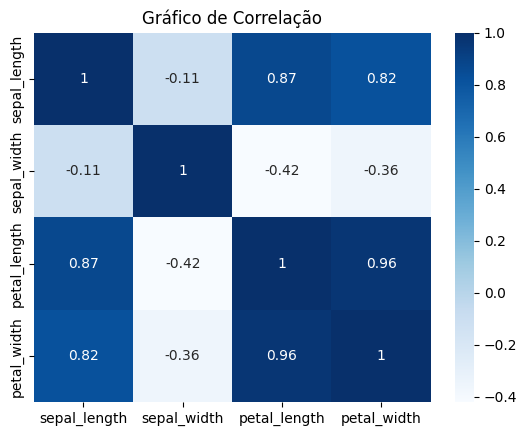

In [83]:
# heatmap de correlação
correlacao = df_encoded.corr(numeric_only=True) # utilizando apenas valores numericos
sns.heatmap(corr, annot=True, cmap='Blues') # annot=true para para exibir os valores numéricos de correlação diretamente no gráfico.
plt.title('Gráfico de Correlação')          # usei o esquema de cores "blues"
plt.show

> ### Gráfico de Correlação
> O gráfico de correlação mostra as relações entre as variáveis do conjunto de dados. Valores próximos de 1 indicam alta correlação positiva, enquanto valores próximos de -1 indicam alta correlação negativa. 

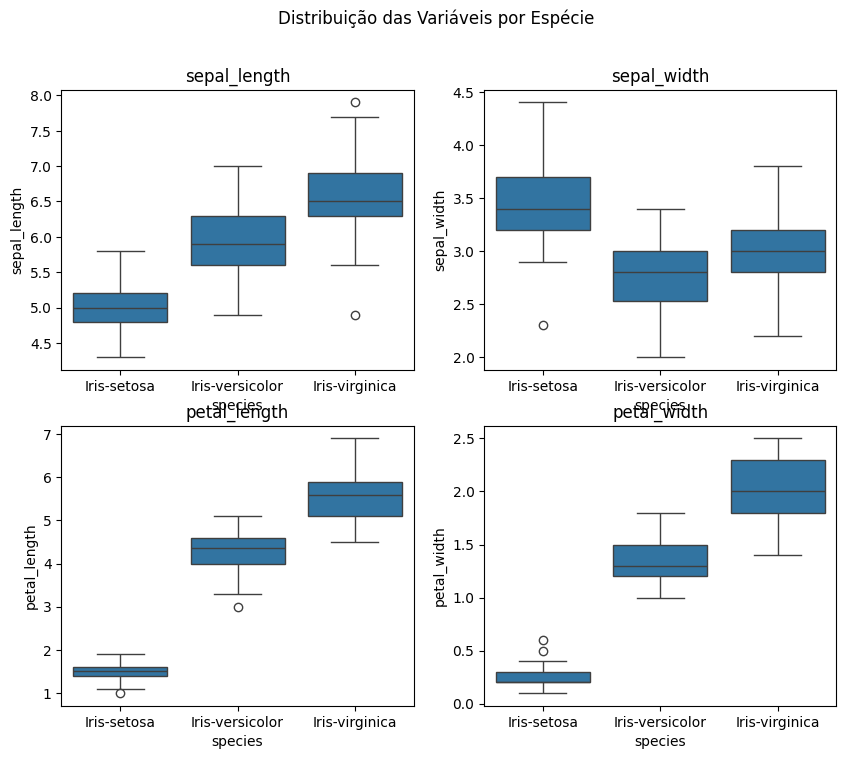

In [84]:
# boxplots para cada variável por espécie
plt.figure(figsize=(10, 8))

for i, column in enumerate(df.columns[:-1]):  # itera sobre as colunas do df, menos a ultima: 'species'
    plt.subplot(2, 2, i+1) # cria uma grade de 2x2 para exibir múltiplos gráficos, posicionando o gráfico atual
    sns.boxplot(x='species', y=column, data=df) # cria um boxplot para cada variável em relação à espécie
    plt.title(column)
plt.suptitle('Distribuição das Variáveis por Espécie')
plt.show()

### Boxplots para cada variável por espécie
> Os _boxplots_ mostram a distribuição de cada variável separada por espécie. A linha central no _boxplot_ representa a mediana, enquanto as bordas do boxplot representam o primeiro e o terceiro quartis. Os "bigodes" mostram a variabilidade dos dados, e os pontos fora dos bigodes são considerados _outliers_.



#### Variáveis e valores que contribuem para a definição das espécie
Os resultados mostram que as váriaveis da largura e comprimento das pétalas são altamente correlacionadas, ou seja, são valores importantes para a classificação das espécies.

A variável de comprimento da sépala também tem forte correlação com as variáveis da pétala, mas a variável da largura da sépala tem uma correlação negativa moderada com as outras variáveis, o que a torna menos útil para a classificação das espécies.

#### Relação entre as Variáveis e as Espécies
- **Iris-Setosa**: Apresenta pétalas curtas e estreitas, com valores menores para o comprimento e largura da pétala. As sépalas também são relativamente menores.
- **Iris-Versicolar**: Possui valores intermediários em todas as medidas, com pétalas mais longas e largas do que a Iris-setosa, mas menores do que a Iris-virginica.
- **Iris-Virginica**: Caracteriza-se por pétalas mais longas e largas, além de apresentar os maiores valores médios para as variáveis de comprimento e largura da sépala e pétala.

### Exportação dos Gráficos

Foi exportado um dos gráficos criados (por exemplo, o gráfico de distribuição por espécie):

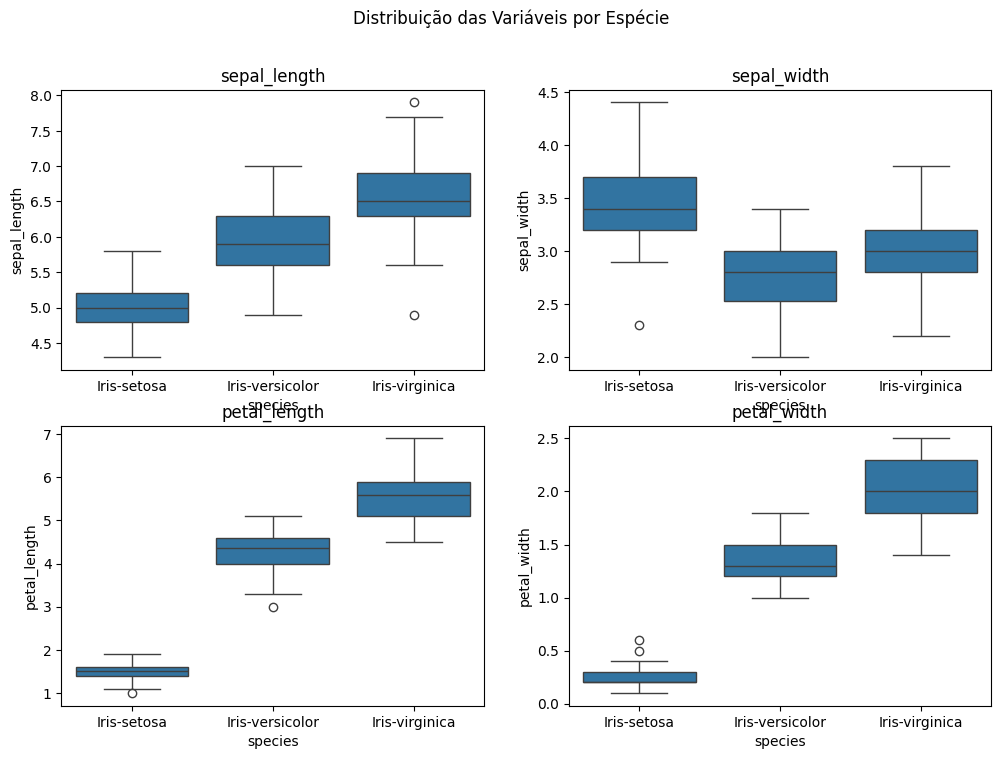

In [78]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(column)
plt.suptitle('Distribuição das Variáveis por Espécie')
plt.savefig('distribuicao_por_especie.png')
plt.show()